<a href="https://colab.research.google.com/github/priyanu17/clustering_analysis/blob/master/Country_Clustering_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read data
country_data = pd.read_csv("Country-data.csv")
column_des = pd.read_csv("data-dictionary+.csv")

In [4]:
# contains columns description for the country dataset
column_des

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [5]:
column_des.shape 

(10, 2)

In [6]:
column_des.columns

Index(['Column Name', 'Description'], dtype='object')

In [7]:
# print complete descriptions

pd.options.display.max_colwidth = 150
column_des_2 = column_des.set_index("Column Name")
print((column_des_2.loc[ : , "Description"]))

Column Name
country                                                                                                    Name of the country
child_mort                                                         Death of children under 5 years of age per 1000 live births
exports                                          Exports of goods and services per capita. Given as %age of the GDP per capita
health                                                       Total health spending per capita. Given as %age of GDP per capita
imports                                          Imports of goods and services per capita. Given as %age of the GDP per capita
Income                                                                                                   Net income per person
Inflation                                                           The measurement of the annual growth rate of the Total GDP
life_expec    The average number of years a new born child would live if the current mortality patt

In [8]:
# Data Exploration

In [9]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [10]:
country_data.shape

(167, 10)

In [11]:
country_data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [12]:
# rearrange columns in the dataframe :
# "child_mort" , "health", "life_expec" , "total_fer" -- health factors 
# "exports", "imports", -- trade factors
# "income", "inflation", "gdpp" -- financial factors

country_data = country_data[["country",
                             'child_mort', 'health', 'life_expec', 'total_fer',
                             "exports", "imports",
                             "income", "inflation", "gdpp"]]




In [13]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   health      167 non-null    float64
 3   life_expec  167 non-null    float64
 4   total_fer   167 non-null    float64
 5   exports     167 non-null    float64
 6   imports     167 non-null    float64
 7   income      167 non-null    int64  
 8   inflation   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [14]:
country_data.describe()

,child_mort,health,life_expec,total_fer,exports,imports,income,inflation,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,6.815689,70.555689,2.947964,41.108976,46.890215,17144.688623,7.781832,12964.155689
std,40.328931,2.746837,8.893172,1.513848,27.412010,24.209589,19278.067698,10.570704,18328.704809
min,2.600000,1.810000,32.100000,1.150000,0.109000,0.065900,609.000000,-4.210000,231.000000
25%,8.250000,4.920000,65.300000,1.795000,23.800000,30.200000,3355.000000,1.810000,1330.000000
50%,19.300000,6.320000,73.100000,2.410000,35.000000,43.300000,9960.000000,5.390000,4660.000000
75%,62.100000,8.600000,76.800000,3.880000,51.350000,58.750000,22800.000000,10.750000,14050.000000
max,208.000000,17.900000,82.800000,7.490000,200.000000,174.000000,125000.000000,104.000000,105000.000000


In [15]:
country_data.dtypes

country        object
child_mort    float64
health        float64
life_expec    float64
total_fer     float64
exports       float64
imports       float64
income          int64
inflation     float64
gdpp            int64
dtype: object

In [16]:
# all feature columns are numeric except the name of the countries.

In [17]:
# checking for duplicate entries in dataset
country_data.duplicated(keep = "first").value_counts()

False    167
dtype: int64

In [18]:
# no duplicate entries exist 

In [19]:
# constant feature columns - columns with a single value in the entire dataset

def find_constant_features(dataFrame):
    const_features = []
    for column in list(dataFrame.columns):
        if dataFrame[column].unique().size < 2:
            const_features.append(column)
    return const_features

In [20]:
print("Constant feature columns are : ")
find_constant_features(country_data)

Constant feature columns are : 


[]

In [21]:
# no constant feature columns are present

In [22]:
# checking for null values
country_data.isna().sum()

country       0
child_mort    0
health        0
life_expec    0
total_fer     0
exports       0
imports       0
income        0
inflation     0
gdpp          0
dtype: int64

In [23]:
# no null values present in the dataset

In [24]:
# Univariate Analysis

In [25]:
sns.set_context("paper")
sns.set(palette = "bright")

In [26]:
# Child Mortality:

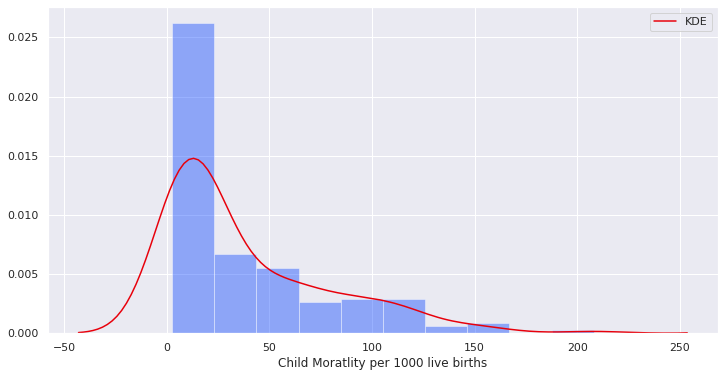

In [27]:
# Histogram + Kernel Density Estimate plot using Distplot
plt.figure(figsize = (12, 6))
sns.distplot(country_data["child_mort"], kde=True, bins = 10, color = 'b',kde_kws={"color": "r", "lw": 1.5, "label": "KDE"},)
plt.xlabel("Child Moratlity per 1000 live births")
plt.show()

In [28]:
# countries with high child mortality rates

country_data[country_data["child_mort"] > 100][["country", "child_mort"]].sort_values(by = ["child_mort"], ascending = False)

,country,child_mort
66,Haiti,208.0
132,Sierra Leone,160.0
32,Chad,150.0
31,Central African Republic,149.0
97,Mali,137.0
113,Nigeria,130.0
112,Niger,123.0
3,Angola,119.0
37,"Congo, Dem. Rep.",116.0
25,Burkina Faso,116.0


In [29]:
 # number of countries with high child moratlity rates (> 100)

print("Number of countries with high child mortality : ")
country_data[country_data["child_mort"] > 100].shape[0]


Number of countries with high child mortality : 


17

In [30]:
# Health Spending:

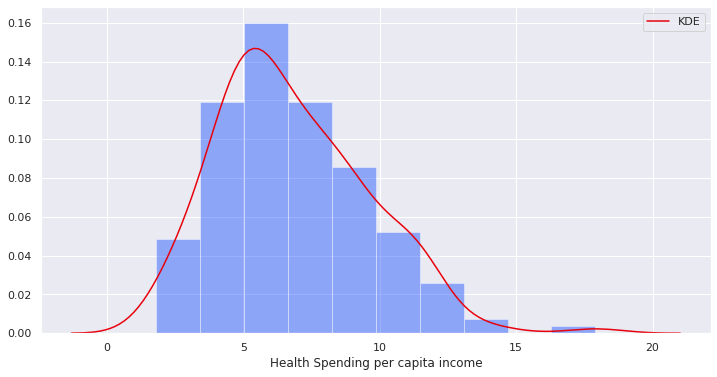

In [31]:
# Histogram + Kernel Density Estimate plot using Distplot
sns.set(palette = "bright")

plt.figure(figsize = (12, 6))
sns.distplot(country_data["health"], kde=True, bins = 10, color = 'b',kde_kws={"color": "r", "lw": 1.5, "label": "KDE"},)
plt.xlabel("Health Spending per capita income")
plt.show()

In [32]:
# the plot shows majority countries have a steady health spending

In [33]:
# countries with high health spending:

country_data[country_data["health"] > 11][["country", "health"]].sort_values(by = ["health"], ascending = False)

,country,health
159,United States,17.9
101,"Micronesia, Fed. Sts.",14.2
132,Sierra Leone,13.1
54,France,11.9
110,Netherlands,11.9
88,Liberia,11.8
102,Moldova,11.7
26,Burundi,11.6
58,Germany,11.6
145,Switzerland,11.5


In [34]:
# "United States" has the highest health spending amongst all countries in the dataset 

In [35]:
# Life Expectency:

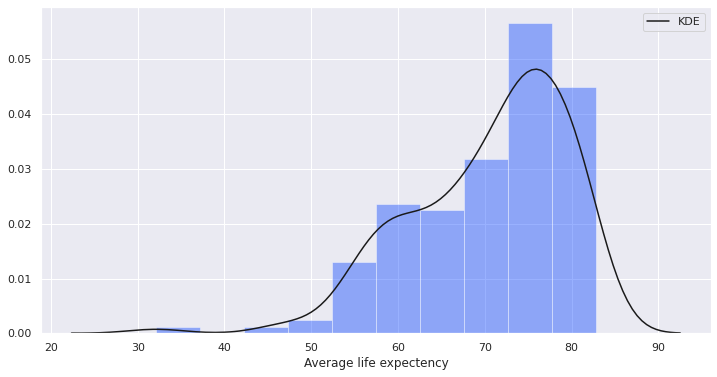

In [36]:
# Histogram + Kernel Density Estimate plot using Distplot
sns.set(palette = "bright")

plt.figure(figsize = (12, 6))
sns.distplot(country_data["life_expec"], kde=True, bins = 10, color = 'b',kde_kws={"color": "k", "lw": 1.5, "label": "KDE"},)
plt.xlabel("Average life expectency")
plt.show()

In [37]:
# right skewed graph of life expectency shows that most nations is high
# a few countries have lower life expectencies

In [38]:
# countries with lower life expectencies: 

country_data[country_data["life_expec"] < 55][["country", "life_expec"]].sort_values(by = ["life_expec"])

,country,life_expec
66,Haiti,32.1
87,Lesotho,46.5
31,Central African Republic,47.5
166,Zambia,52.0
94,Malawi,53.1
137,South Africa,54.3
106,Mozambique,54.5


In [39]:
# above countries have very low life expectencies

# lowest is "Haiti"

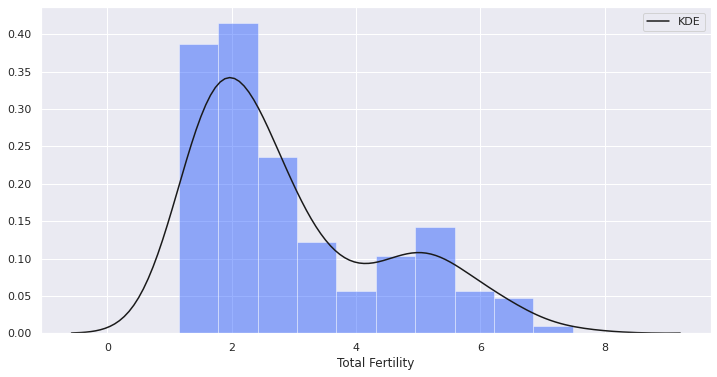

In [40]:
# Histogram + Kernel Density Estimate plot using Distplot
sns.set(palette = "bright")

plt.figure(figsize = (12, 6))
sns.distplot(country_data["total_fer"], kde=True, bins = 10, color = 'b',kde_kws={"color": "k", "lw": 1.5, "label": "KDE"},)
plt.xlabel("Total Fertility")
plt.show()

In [41]:
# higher middle bars show that total fertility values stands at 1-3 for most nations 
# countries with higher fertility rates are led towards high population growths

In [42]:
# Exports:

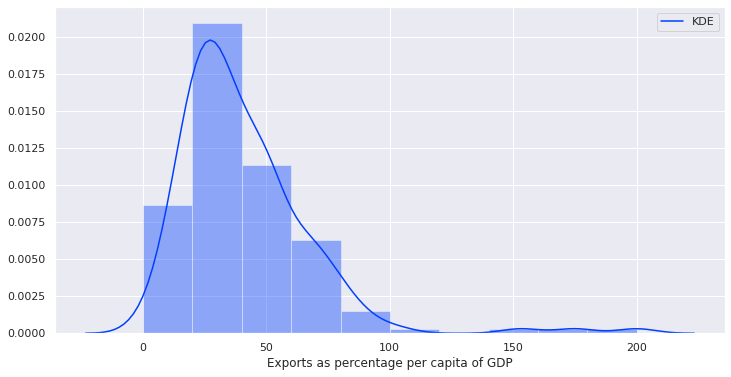

In [43]:
# Histogram + Kernel Density Estimate plot using Distplot
sns.set(palette = "bright")

plt.figure(figsize = (12, 6))
sns.distplot(country_data["exports"], kde=True, bins = 10, color = 'b',kde_kws={"color": "b", "lw": 1.5, "label": "KDE"},)
plt.xlabel("Exports as percentage per capita of GDP")
plt.show()

In [44]:
# countries with high exports ( > 90)

country_data[country_data["exports"] > 90][["country", "exports"]].sort_values(by = ["exports"], ascending = False)

,country,exports
133,Singapore,200.0
91,Luxembourg,175.0
98,Malta,153.0
73,Ireland,103.0
131,Seychelles,93.8


In [45]:
# "Singapore" has the highest number of exports

In [46]:
# countries with low exports ( < 10)

country_data[country_data["exports"] < 10][["country", "exports", "imports"]]

,country,exports,imports
26,Burundi,8.920,39.2000
50,Eritrea,4.790,23.3000
107,Myanmar,0.109,0.0659
109,Nepal,9.580,36.4000
149,Timor-Leste,2.200,27.8000


In [47]:
# "Myanmar" has low exports and low imports -- signifies a "Closed" economy

In [48]:
# Imports:

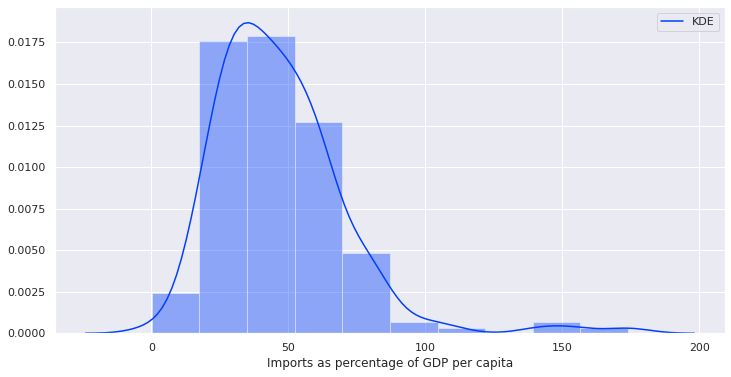

In [49]:
# Histogram + Kernel Density Estimate plot using Distplot
sns.set(palette = "bright")

plt.figure(figsize = (12, 6))
sns.distplot(country_data["imports"], kde=True, bins = 10, color = 'b',kde_kws={"color": "b", "lw": 1.5, "label": "KDE"},)
plt.xlabel("Imports as percentage of GDP per capita")
plt.show()

In [50]:
# countries with high imports:

country_data[country_data["imports"] > 100][["country", "exports", "imports"]]

,country,exports,imports
87,Lesotho,39.4,101.0
91,Luxembourg,175.0,142.0
98,Malta,153.0,154.0
131,Seychelles,93.8,108.0
133,Singapore,200.0,174.0


In [51]:
# countries with low imports:

country_data[country_data["imports"] < 10][["country", "exports", "imports"]]

,country,exports,imports
107,Myanmar,0.109,0.0659


In [52]:
# only maynmar has less than 10% of total imports

In [53]:
# Income:

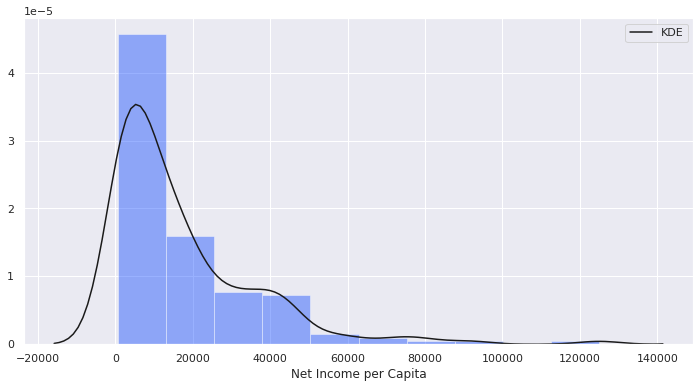

In [54]:
# Histogram + Kernel Density Estimate plot using Distplot
sns.set(palette = "bright")

plt.figure(figsize = (12, 6))
sns.distplot(country_data["income"], kde=True, bins = 10, color = 'b',kde_kws={"color": "k", "lw": 1.5, "label": "KDE"},)
plt.xlabel("Net Income per Capita")
plt.show()

In [55]:
# countries with high net income per capita

country_data[country_data["income"] > 50000][["country", "income", "gdpp"]].sort_values(by = ["income"])

,country,income,gdpp
145,Switzerland,55500,74600
157,United Arab Emirates,57600,35000
114,Norway,62300,87800
133,Singapore,72100,46600
82,Kuwait,75200,38500
23,Brunei,80600,35300
91,Luxembourg,91700,105000
123,Qatar,125000,70300


In [56]:
# highest net income per capita "Qatar"

In [57]:
# Inflation:

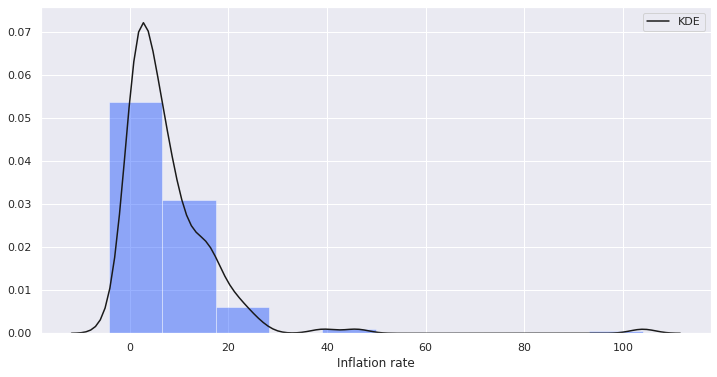

In [58]:
# Histogram + Kernel Density Estimate plot using Distplot
sns.set(palette = "bright")

plt.figure(figsize = (12, 6))
sns.distplot(country_data["inflation"], kde=True, bins = 10, color = 'b',kde_kws={"color": "k", "lw": 1.5, "label": "KDE"},)
plt.xlabel("Inflation rate")
plt.show()

In [59]:
# countries with high inflation rates :

country_data[country_data["inflation"] > 20][["country", "inflation"]].sort_values(by = ["inflation"], ascending = False)

,country,inflation
113,Nigeria,104.0
163,Venezuela,45.9
103,Mongolia,39.2
149,Timor-Leste,26.5
49,Equatorial Guinea,24.9
165,Yemen,23.6
140,Sri Lanka,22.8
3,Angola,22.4
5,Argentina,20.9
37,"Congo, Dem. Rep.",20.8


In [60]:
# "Nigeria" has the highest inflation rate amongst all conutries

In [61]:
# GDPP(Gross Domestic Product per capita)

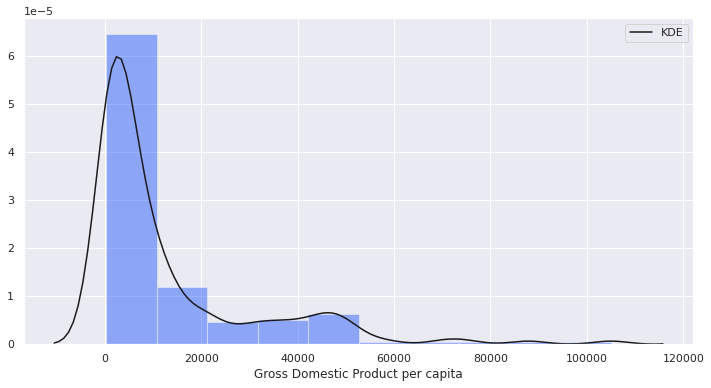

In [62]:
# Histogram + Kernel Density Estimate plot using Distplot
sns.set(palette = "bright")

plt.figure(figsize = (12, 6))
sns.distplot(country_data["gdpp"], kde=True, bins = 10, color = 'b',kde_kws={"color": "k", "lw": 1.5, "label": "KDE"},)
plt.xlabel("Gross Domestic Product per capita")
plt.show()

In [63]:
# countries with higher GDP signify developed nations
# such countries are less in number
# Higher GDPP shows better standard of living 
# Lower GDPP shows poorer standard of living

In [64]:
# countries with high gdpp (Gross Domestic Product per capita)

country_data[country_data["gdpp"] > 50000][["country", "gdpp"]].sort_values(by = ["gdpp"], ascending = False)

,country,gdpp
91,Luxembourg,105000
114,Norway,87800
145,Switzerland,74600
123,Qatar,70300
44,Denmark,58000
144,Sweden,52100
7,Australia,51900
110,Netherlands,50300


In [65]:
# "Luxembourg" has the highest gross domestic product per capita

In [66]:
# Bivariate Analysis

In [67]:
country_data.corr()

,child_mort,health,life_expec,total_fer,exports,imports,income,inflation,gdpp
child_mort,1.000000,-0.200402,-0.886676,0.848478,-0.318093,-0.127211,-0.524315,0.288276,-0.483032
health,-0.200402,1.000000,0.210692,-0.196674,-0.114408,0.095717,0.129579,-0.255376,0.345966
life_expec,-0.886676,0.210692,1.000000,-0.760875,0.316313,0.054391,0.611962,-0.239705,0.600089
total_fer,0.848478,-0.196674,-0.760875,1.000000,-0.320011,-0.159048,-0.501840,0.316921,-0.454910
exports,-0.318093,-0.114408,0.316313,-0.320011,1.000000,0.737381,0.516784,-0.107294,0.418725
imports,-0.127211,0.095717,0.054391,-0.159048,0.737381,1.000000,0.122406,-0.246994,0.115498
income,-0.524315,0.129579,0.611962,-0.501840,0.516784,0.122406,1.000000,-0.147756,0.895571
inflation,0.288276,-0.255376,-0.239705,0.316921,-0.107294,-0.246994,-0.147756,1.000000,-0.221631
gdpp,-0.483032,0.345966,0.600089,-0.454910,0.418725,0.115498,0.895571,-0.221631,1.000000


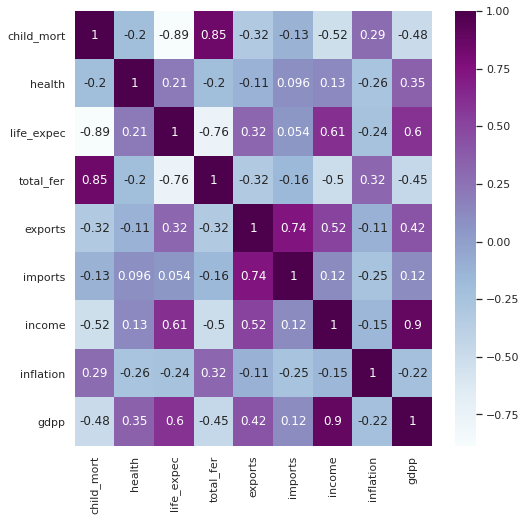

In [68]:
# heatmap :
plt.figure(figsize = (8, 8))
sns.heatmap(country_data.corr(), cmap="BuPu", annot = True)
plt.show()

In [69]:
import plotly.express as pe

In [70]:
pe.scatter(country_data, x = "child_mort", y = "health", height = 500, width = 600, hover_data = ["country"])

In [71]:
pe.scatter(country_data, x = "total_fer", y = "child_mort", height = 500, width = 600, hover_data = ["country"])

In [72]:
pe.scatter(country_data, x = "child_mort", y = "life_expec", height = 500, width = 600, hover_data = ["country"])

In [136]:
# high negative correlation between "child_mort" and "total_fer"

In [74]:
pe.scatter(country_data, x = "child_mort", y = "income", height = 500, width = 600, hover_data = ["country"])

In [75]:
# low income countries have higher chils mortality

In [76]:
pe.scatter(country_data, x = "total_fer", y = "life_expec", height = 500, width = 600, hover_data = ["country"])

In [77]:

pe.scatter(country_data, x = "exports", y = "imports",color = "country", height = 500, width = 800)

In [78]:
pe.scatter(country_data, x = "inflation", y = "gdpp", color = "country", height = 500, width = 800)

In [79]:
# "Nigeria" and "Luxenbourg" are at the extreme edges of the plot

In [80]:
pe.scatter(country_data, x = "income", y = "gdpp", color = "country", height = 500, width = 800)

In [81]:
# Income and gdpp have a largely linear relationship

In [82]:
# Outlier Detection : 

In [83]:
import plotly.express as pe

In [84]:
def outlier_plot(column, title):
    fig = pe.box(country_data, y=column, points="all", hover_name = "country", height = 300, width = 400)
    fig.update_layout(
        title=title,
        margin=dict(l=20, r=20, t=30, b=20),
        paper_bgcolor="LightSteelBlue",
    )
    #fig.update_traces(quartilemethod="exclusive")
    fig.show()

In [85]:
outlier_plot("child_mort", " Child Mortality per 1000 live births")

In [86]:
outlier_plot("health", "Health Spending of Countries")

In [87]:
outlier_plot("total_fer", "Total Fertility of Countries")

In [88]:
outlier_plot("life_expec", "Life Expectency of Countries")

In [89]:
outlier_plot("exports", "Exports as percentage of GDP per capita")

In [90]:
outlier_plot("imports", "Imports as percentage of GDP per capita")

In [91]:
outlier_plot("income", "Net Income per person")

In [92]:
outlier_plot("inflation", "Inflation rate of countries")

In [93]:
outlier_plot("gdpp", "Gross Domestic Product per capita")

In [94]:
# outliers have not been removed as they are crucial characteristics of a few countries(which signifies extreme values)

In [95]:
# Feature Scaling :

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(country_data.iloc[:, 1:])

# head of scaled data
pd.DataFrame(data_scaled).head()

,0,1,2,3,4,5,6,7,8
0,1.291532,0.279088,-1.619092,1.902882,-1.138280,-0.082455,-0.808245,0.157336,-0.679180
1,-0.538949,-0.097016,0.647866,-0.859973,-0.479658,0.070837,-0.375369,-0.312347,-0.485623
2,-0.272833,-0.966073,0.670423,-0.038404,-0.099122,-0.641762,-0.220844,0.789274,-0.465376
3,2.007808,-1.448071,-1.179234,2.128151,0.775381,-0.165315,-0.585043,1.387054,-0.516268
4,-0.695634,-0.286894,0.704258,-0.541946,0.160668,0.497568,0.101732,-0.601749,-0.041817


In [97]:
# statistical features for the scaled data :
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-2.659217e-17,5.218713e-16,3.616535e-16,3.124580e-16,2.383323e-16,2.871954e-16,-7.512288e-17,8.376533e-17,2.127373e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-8.871383e-01,-1.827827e+00,-4.337186e+00,-1.191250e+00,-1.500192e+00,-1.939940e+00,-8.603259e-01,-1.137852e+00,-6.968005e-01
25%,-7.466190e-01,-6.922106e-01,-5.927576e-01,-7.639023e-01,-6.333367e-01,-6.914785e-01,-7.174558e-01,-5.666409e-01,-6.366596e-01
50%,-4.717981e-01,-1.810007e-01,2.869576e-01,-3.564309e-01,-2.235279e-01,-1.487432e-01,-3.738080e-01,-2.269504e-01,-4.544309e-01
75%,5.926666e-01,6.515412e-01,7.042584e-01,6.175252e-01,3.747198e-01,4.913530e-01,2.942370e-01,2.816364e-01,5.942100e-02
max,4.221297e+00,4.047436e+00,1.380962e+00,3.009349e+00,5.813835e+00,5.266181e+00,5.611542e+00,9.129718e+00,5.036507e+00


In [98]:
# K-Means Clustring:

X = data_scaled

In [99]:
print(X)

[[ 1.29153238  0.27908825 -1.61909203 ... -0.8082454   0.15733622
  -0.67917961]
 [-0.5389489  -0.09701618  0.64786643 ... -0.3753689  -0.31234747
  -0.48562324]
 [-0.27283273 -0.96607302  0.67042323 ... -0.22084447  0.78927429
  -0.46537561]
 ...
 [-0.37231541  0.0088773   0.28695762 ... -0.65840354  0.40973191
  -0.63775406]
 [ 0.44841668 -0.59727159 -0.34463279 ... -0.65892382  1.50091625
  -0.63775406]
 [ 1.11495062 -0.33801514 -2.09278484 ... -0.72135793  0.59001454
  -0.62954556]]


In [100]:
# calculation for the elbow method plot:

from sklearn.cluster import KMeans

sum_of_distances =[]
for i in range (1,15+1):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =500, n_init = 10, random_state = 0)
    kmeans.fit(X)
    sum_of_distances.append(kmeans.inertia_)

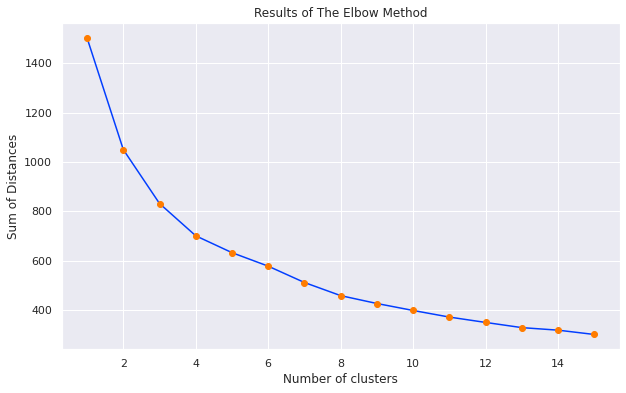

In [101]:
# Plot the graph to visualize the Elbow Method to find the optimal number of clusters 

plt.figure(figsize = (10, 6))
plt.plot(range(1,15+1),sum_of_distances)
plt.plot(range(1,15+1), sum_of_distances, 'o')
plt.title('Results of The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Distances')
plt.grid(True)
plt.show()

In [102]:
# K Means Clustering with K = 3 

from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters= 3, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [103]:
y_kmeans

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1], dtype=int32)

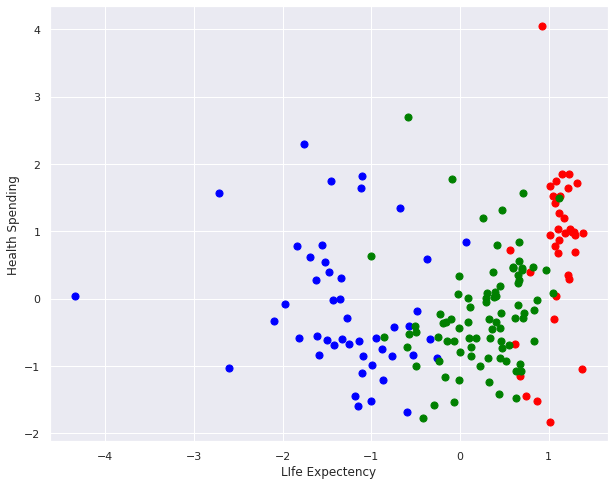

In [104]:
# Life Expectency vs Health Spending plot for the three clusters :

plt.figure(figsize = (10, 8))

plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0,1],s = 50, c='red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1,1],s = 50, c='blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2,1],s = 50, c='green', label = 'Cluster 3')

plt.xlabel("LIfe Expectency")
plt.ylabel("Health Spending")
plt.show()

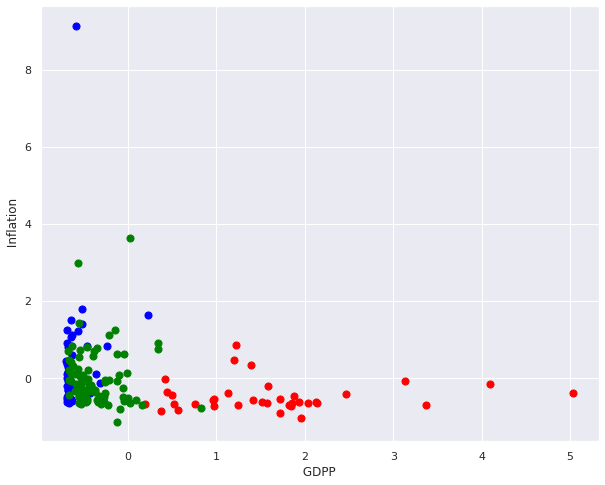

In [105]:
# Inflation vs GDPP plot for the three clusters :

plt.figure(figsize = (10, 8))

plt.scatter(X[y_kmeans == 0, 8], X[y_kmeans == 0, 7],s = 50, c='red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 8], X[y_kmeans == 1, 7],s = 50, c='blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 8], X[y_kmeans == 2, 7],s = 50, c='green', label = 'Cluster 3')

plt.xlabel(" GDPP ")
plt.ylabel(" Inflation")
plt.show()

In [106]:
# from above plots, we can conclude that:

# Cluster 0 (shown in Red) -- Developed Countries
# Cluster 1 (shown in Blue) -- Underdeveloped Countries
# Cluster 2 (shown in Green) -- Developing Countries

# here cluster number signifies category and does not have any inherent ranking by default

In [107]:
# Hierarchical Clustering analysis 

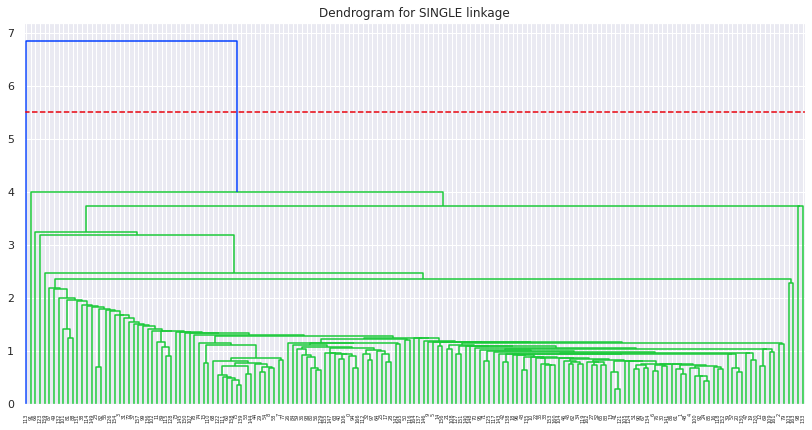

In [108]:
# Dendrogram for "SINGLE" linkage clustering:

from scipy.cluster.hierarchy import dendrogram, linkage 
plt.figure(figsize=(14, 7))  
plt.title("Dendrogram for SINGLE linkage")  
dend_single = dendrogram(linkage(data_scaled, method='single'))
plt.axhline(y=5.5, color='r', linestyle='--')
plt.show()

In [109]:
# Optimal number of Clusters from single linkage analysis : 2


# single linkage is not very useful as it clusters all data points but one into a single cluster 
# and the other cluster has just one point

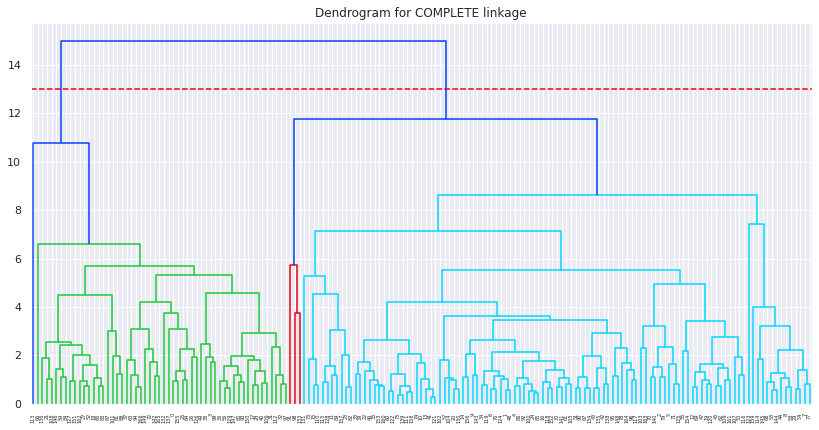

In [110]:
# Dendrogram for "COMPLETE" linkage clustering:

from scipy.cluster.hierarchy import dendrogram, linkage 
plt.figure(figsize=(14, 7))  
plt.title("Dendrogram for COMPLETE linkage")  
dend_complete = dendrogram(linkage(data_scaled, method='complete'))
plt.axhline(y=13, color='r', linestyle='--')
plt.show()

In [111]:
# Optimal number of Clusters from Complete linkage analysis : 2

In [112]:
# Hierarchical clustering with no of clusters = 2 : (using COMPLETE linkage)

from sklearn.cluster import AgglomerativeClustering

hierar_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')  


In [113]:
y_hierar = hierar_cluster.fit_predict(data_scaled)

In [114]:
y_hierar

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1])

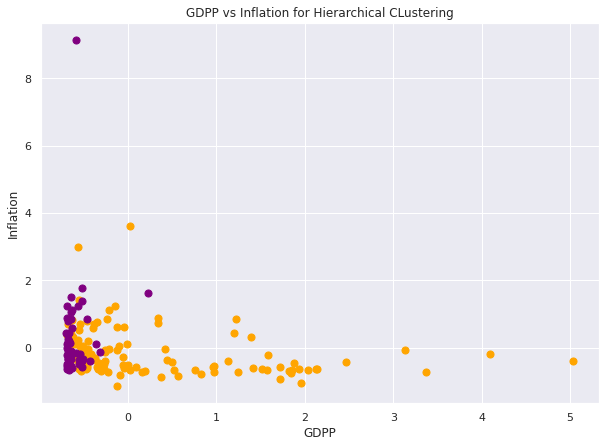

In [115]:
# Inflation vs GDPP plot for the two clusters :

plt.figure(figsize=(10, 7))  

plt.scatter(X[y_hierar == 0, 8], X[y_hierar == 0, 7],s = 50, c='orange', label = 'Cluster 1')
plt.scatter(X[y_hierar == 1, 8], X[y_hierar == 1, 7],s = 50, c='purple', label = 'Cluster 2')

plt.title("GDPP vs Inflation for Hierarchical CLustering")
plt.xlabel("GDPP")
plt.ylabel("Inflation")

plt.show()

In [116]:
# from above plot we can conclude the following :

# Cluster 0 -- UNder Developed Countries
# Cluster 1 -- Developed Countries

In [117]:
# Using K-Means results as the final clusters -- the countries are more accurately segregated 

In [118]:
country_data.loc[:, "cluster"] = y_kmeans

In [119]:
country_data

,country,child_mort,health,life_expec,total_fer,exports,imports,income,inflation,gdpp,cluster
0,Afghanistan,90.2,7.58,56.2,5.82,10.0,44.9,1610,9.44,553,1
1,Albania,16.6,6.55,76.3,1.65,28.0,48.6,9930,4.49,4090,2
2,Algeria,27.3,4.17,76.5,2.89,38.4,31.4,12900,16.10,4460,2
3,Angola,119.0,2.85,60.1,6.16,62.3,42.9,5900,22.40,3530,1
4,Antigua and Barbuda,10.3,6.03,76.8,2.13,45.5,58.9,19100,1.44,12200,2
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,5.25,63.0,3.50,46.6,52.7,2950,2.62,2970,2
163,Venezuela,17.1,4.91,75.4,2.47,28.5,17.6,16500,45.90,13500,2
164,Vietnam,23.3,6.84,73.1,1.95,72.0,80.2,4490,12.10,1310,2
165,Yemen,56.3,5.18,67.5,4.67,30.0,34.4,4480,23.60,1310,1


In [120]:
# Cluster number significance for 

# Cluster 0 -- Developed Countries
# Cluster 1 -- Underdeveloped Countries
# Cluster 2 -- Developing Countries

In [121]:
country_data["cluster"].value_counts()

2    84
1    47
0    36
Name: cluster, dtype: int64

In [122]:
# Visualizations on the Clusters : 

# parameters included : "child_mort", "income", "gdpp"

In [123]:
fig = pe.scatter(country_data, x = "child_mort", y = "income", color = "cluster",
           height = 500, width = 800, 
           hover_data = ["country"])
fig.update_traces(mode='markers', marker_line_width=1, marker_size=10)
fig.update_layout(title='Income vs Child Mortality of all Clusters',
                  yaxis_zeroline=False, xaxis_zeroline=False)
fig.show()

In [124]:
fig = pe.scatter(country_data, x = "child_mort", y = "gdpp", color = "cluster",
           height = 500, width = 800, 
           hover_data = ["country"])
fig.update_traces(mode='markers', marker_line_width=1, marker_size=10)
fig.update_layout(title='GDPP vs Child Mortality of all Clusters',
                  yaxis_zeroline=False, xaxis_zeroline=False)
fig.show()

In [125]:
fig = pe.scatter(country_data, x = "gdpp", y = "income", color = "cluster",
           height = 500, width = 800, 
           hover_data = ["country"])
fig.update_traces(mode='markers', marker_line_width=1, marker_size=10)
fig.update_layout(title='GDPP vs Income of all Clusters',
                  yaxis_zeroline=False, xaxis_zeroline=False)
fig.show()

In [126]:
# High correlation between "GDPP" and "Income" for all clusters

In [127]:
country_data.groupby("cluster").sum()[[ "exports", "imports", "income", "gdpp"]]

,exports,imports,income,gdpp
cluster,,,,
0,2114.600,1853.7000,1644200,1529800
1,1370.110,1989.2000,185293,90352
2,3380.489,3987.7659,1033670,544862


In [128]:
country_data.groupby("cluster").mean()

,child_mort,health,life_expec,total_fer,exports,imports,income,inflation,gdpp
cluster,,,,,,,,,
0,5.000000,8.807778,80.127778,1.752778,58.738889,51.491667,45672.222222,2.671250,42494.444444
1,92.961702,6.388511,59.187234,5.008085,29.151277,42.323404,3942.404255,12.019681,1922.382979
2,21.927381,6.200952,72.814286,2.307500,40.243917,47.473404,12305.595238,7.600905,6486.452381


In [129]:
# shows groupby mean values for all columns of different clusters

### Observations from above :

1) "**child_mort**" -> minimum for cluster 0 and maximum for cluster 1

2) "**health**" -> maximum spending for cluster 0 and equivalent spending for cluster 1 and 2

3) "**life_expec**" -> maximum for cluster 0, followed by cluster 2 and is least for cluster 1

4) "**total_fer**" -> minimum for cluster 0, followed by cluster 2 and cluster 1

  -> this implies cluster 1 countries moving towards population explotion

  -> cluster 1 also needs better education opportunitis for its citizens

5) "**exports**" -> highest mean exports for cluster 0, followed by cluster 2 then cluster 1

6) "**imports** -> cluster 0 has highest average imports

7) "**inflation**" -> highest inflation rates for cluster 1 , 

  -> cluster 2 has moderate inflation rate, cluster 0 has lowest inflation rate 
which is favorable

8) "**income**" and "**gdpp**" -> highest average income for cluster 0, moderate for cluster 2 and least for cluster 1




### Conclusions from above :

Cluster 1 countries are in most need for help.The organization "HELP" can focus most on the Cluster 1 countries

In [130]:
# all countries belonging to cluster 1

country_data[country_data["cluster"] == 1][["country"]]

,country
0,Afghanistan
3,Angola
17,Benin
21,Botswana
25,Burkina Faso
26,Burundi
28,Cameroon
31,Central African Republic
32,Chad
36,Comoros


In [131]:
# number of countries in cluster 1
country_data[country_data["cluster"] == 1][["country"]].shape

(47, 1)

In [132]:
# there are 47 countries in cluster 1

In [133]:
country_data.columns[1:-1]

Index(['child_mort', 'health', 'life_expec', 'total_fer', 'exports', 'imports',
       'income', 'inflation', 'gdpp'],
      dtype='object')

In [139]:
# while choosing countries in most dire need of help, we rank factors to be considered as follows:

# health factors > financial factors > trade factors

country_data[country_data["cluster"] == 1].sort_values(by = ["child_mort", "health", "life_expec", "exports", "gdpp", "inflation"],
                                                       ascending = [False, True, True, True, True, False])[:10]

,country,child_mort,health,life_expec,total_fer,exports,imports,income,inflation,gdpp,cluster
66,Haiti,208.0,6.91,32.1,3.33,15.3,64.7,1500,5.45,662,1
132,Sierra Leone,160.0,13.10,55.0,5.20,16.8,34.5,1220,17.20,399,1
32,Chad,150.0,4.53,56.5,6.59,36.8,43.5,1930,6.39,897,1
31,Central African Republic,149.0,3.98,47.5,5.21,11.8,26.5,888,2.01,446,1
97,Mali,137.0,4.98,59.5,6.55,22.8,35.1,1870,4.37,708,1
113,Nigeria,130.0,5.07,60.5,5.84,25.3,17.4,5150,104.00,2330,1
112,Niger,123.0,5.16,58.8,7.49,22.2,49.1,814,2.55,348,1
3,Angola,119.0,2.85,60.1,6.16,62.3,42.9,5900,22.40,3530,1
25,Burkina Faso,116.0,6.74,57.9,5.87,19.2,29.6,1430,6.81,575,1
37,"Congo, Dem. Rep.",116.0,7.91,57.5,6.54,41.1,49.6,609,20.80,334,1


In [140]:
# above we have the list of top 10 countries in most dire need of help
# this list can be shared with the organization